In [ ]:
#Link
#https://microsoft.github.io/autogen/0.2/docs/tutorial/introduction

## Agents

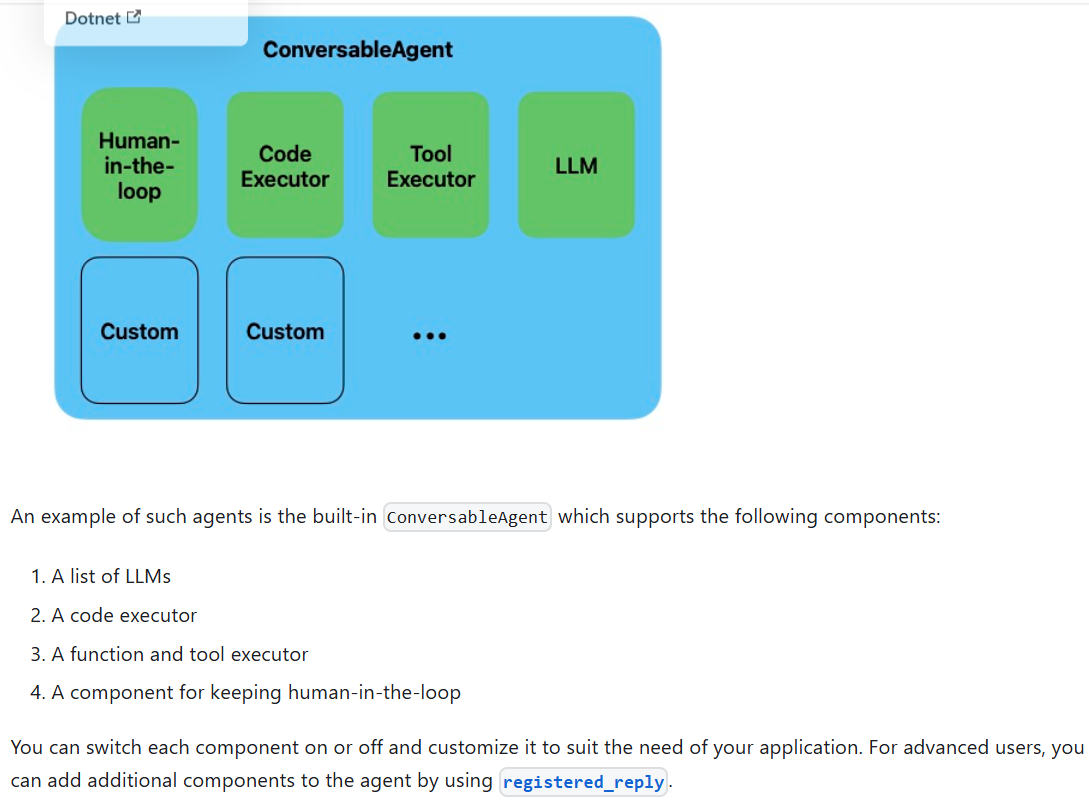

In [2]:
import os

from autogen import ConversableAgent

config_list = [
    {
        "model": "mistral-small-latest",
        "api_key": "Md5ifgn7nuQjtrOOsx69vlP00X3g2lzr",
        "api_type": "mistral",
    }
]

agent = ConversableAgent(
    "chatbot",
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Turn off code execution, by default it is off.
    function_map=None,  # No registered functions, by default it is None.
    human_input_mode="NEVER",  # Never ask for human input.
)

reply = agent.generate_reply(messages=[{"content": "Tell me a joke.", "role": "user"}])
print(reply)

{'content': 'What do you call a fake noodle? An impasta', 'refusal': None, 'role': 'assistant', 'audio': None, 'function_call': None, 'tool_calls': None}


## Roles and Conversations

In [4]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

In [5]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)
result

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Hello there! It's great to be here. I have a joke for you. Here it goes:

Why don't scientists trust atoms?

Because they make up everything!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! I've got one for you too:

What do you call fake spaghetti?

An impasta!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, that's a great one! I love a good food pun. Here's another one for you:

What do you call a can opener that doesn't work?

A can't opener!

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': 'Cathy, tell me a joke.', 'role': 'assistant', 'name': 'joe'}, {'content': "Hello there! It's great to be here. I have a joke for you. Here it goes:\n\nWhy don't scientists trust atoms?\n\nBecause they make up everything!", 'role': 'user', 'name': 'cathy'}, {'content': "Haha, that's a good one, Cathy! I've got one for you too:\n\nWhat do you call fake spaghetti?\n\nAn impasta!", 'role': 'assistant', 'name': 'joe'}, {'content': "Haha, that's a great one! I love a good food pun. Here's another one for you:\n\nWhat do you call a can opener that doesn't work?\n\nA can't opener!", 'role': 'user', 'name': 'cathy'}], summary="Haha, that's a great one! I love a good food pun. Here's another one for you:\n\nWhat do you call a can opener that doesn't work?\n\nA can't opener!", cost={'usage_including_cached_inference': {'total_cost': 0.000509, 'mistral-small-latest': {'cost': 0.000509, 'prompt_tokens': 191, 'completion_tokens': 106, 'total_tokens

## Terminating Conversations Between Agents

In [ ]:
#How to Control Termination with AutoGen? Currently there are two broad mechanism to control the termination of conversations between agents:

# 1. Specify parameters in initiate_chat: When initiating a chat, you can define parameters that determine when the conversation should end.

# 2. Configure an agent to trigger termination: When defining individual agents, you can specify parameters that allow agents to terminate of a conversation based on particular (configurable) conditions.


In [6]:
#Parameters in initiate_chat

import os

from autogen import ConversableAgent

cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Hello there! It's great to be here. I have a joke for you. Here it goes:

Why don't scientists trust atoms?

Because they make up everything!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! I've got one for you too:

What do you call fake spaghetti?

An impasta!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, that's a great one! I love a good food pun. Here's another one for you:

What do you call a can opener that doesn't work?

A can't opener!

--------------------------------------------------------------------------------


In [9]:
#Agent-triggered termination

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
    max_consecutive_auto_reply=1,  # Limit the number of consecutive auto-replies.
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.")
print(result)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Hello there! It's great to be here. I have a joke for you. Here it goes:

Why don't scientists trust atoms?

Because they make up everything!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a good one, Cathy! I've got one for you too:

What do you call fake spaghetti?

An impasta!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, that's a great one! I love a good food pun. Here's another one for you:

What do you call a can opener that doesn't work?

A can't opener!

--------------------------------------------------------------------------------
ChatResult(chat_id=None, chat_history=[{'content': 'Cathy, tell me a joke.', 'role': 'assistant', 'name': 'joe'}, {'content': "Hello there! It's great to be here. I have a joke for you. Her

In [10]:
#Using is_termination_msg

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",  # Never ask for human input.
    is_termination_msg=lambda msg: "good bye" in msg["content"].lower(),
)

result = joe.initiate_chat(cathy, message="Cathy, tell me a joke and then say the words GOOD BYE.")
print(result)

joe (to cathy):

Cathy, tell me a joke and then say the words GOOD BYE.

--------------------------------------------------------------------------------
cathy (to joe):

Sure, here's a joke for you:

What do you call a fake noodle?

An impasta!

GOOD BYE!

--------------------------------------------------------------------------------
ChatResult(chat_id=None, chat_history=[{'content': 'Cathy, tell me a joke and then say the words GOOD BYE.', 'role': 'assistant', 'name': 'joe'}, {'content': "Sure, here's a joke for you:\n\nWhat do you call a fake noodle?\n\nAn impasta!\n\nGOOD BYE!", 'role': 'user', 'name': 'cathy'}], summary="Sure, here's a joke for you:\n\nWhat do you call a fake noodle?\n\nAn impasta!\n\nGOOD BYE!", cost={'usage_including_cached_inference': {'total_cost': 0.001285, 'mistral-small-latest': {'cost': 0.001285, 'prompt_tokens': 457, 'completion_tokens': 276, 'total_tokens': 733}}, 'usage_excluding_cached_inference': {'total_cost': 0.000119, 'mistral-small-latest': {'co

## Allowing Human Feedback in Agents

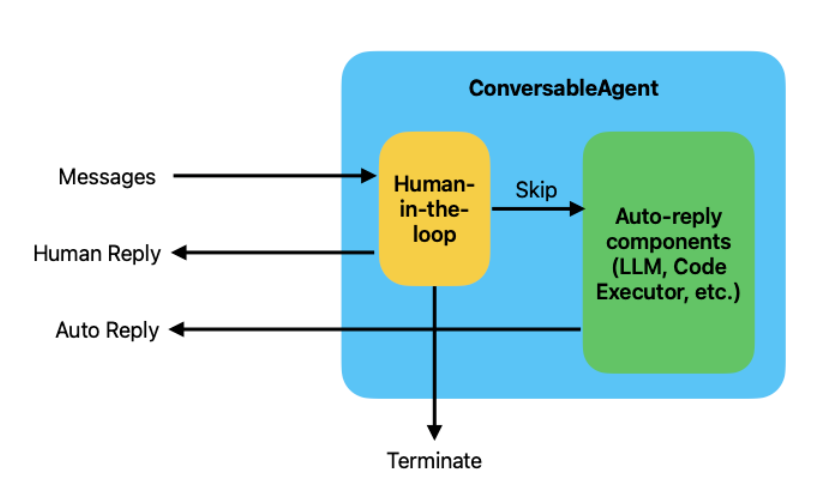

In [ ]:
#Human Input Modes
# 1. Human Input Mode = NEVER
import os

from autogen import ConversableAgent

agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": config_list},
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)
print(result)

In [ ]:
# 2. Human Input Mode = ALWAYS
human_proxy = ConversableAgent(
    "human_proxy",
    llm_config=False,  # no LLM used for human proxy
    human_input_mode="ALWAYS",  # always ask for human input
)

# Start a chat with the agent with number with an initial guess.
result = human_proxy.initiate_chat(
    agent_with_number,  # this is the same agent with the number as before
    message="10",
)
print(result)

In [ ]:
# 3. Human Input Mode = TERMINATE
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. "
    "In the first game, you have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config={"config_list": config_list},
    max_consecutive_auto_reply=1,  # maximum number of consecutive auto-replies before asking for human input
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="TERMINATE",  # ask for human input until the game is terminated
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)
print(result)

## Code Executors

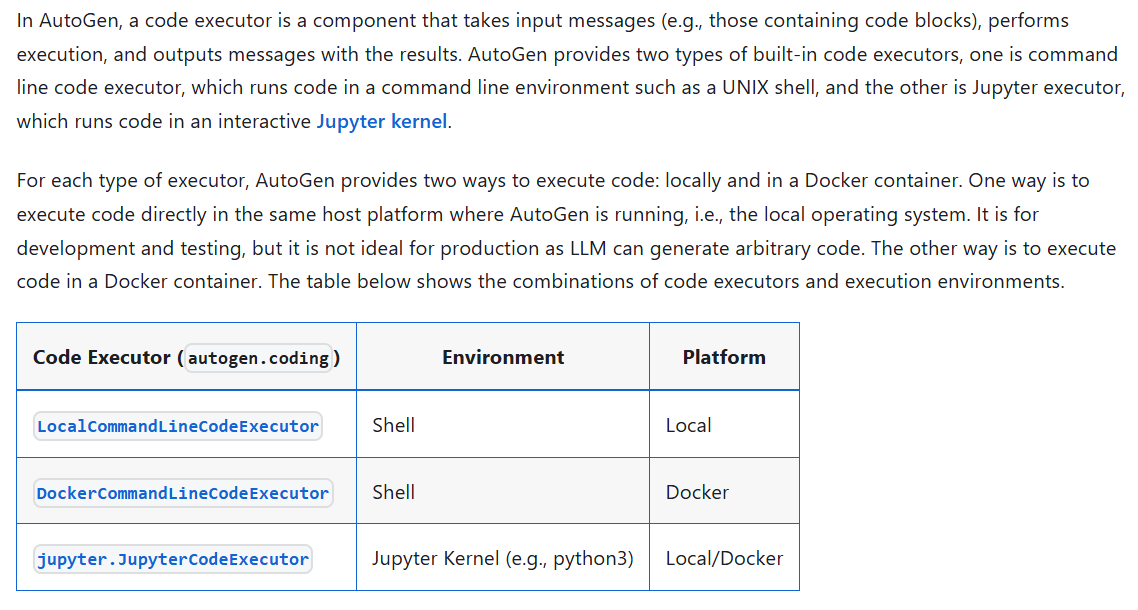

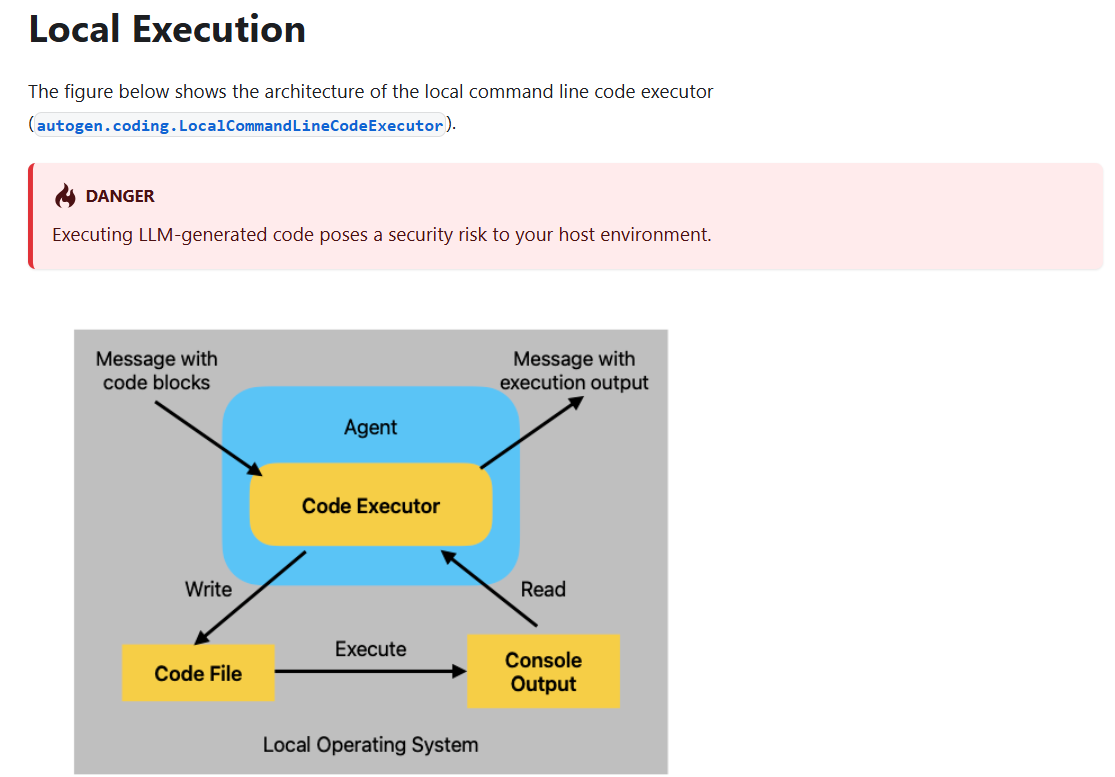

In [12]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

In [14]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter.png')
print('Scatter plot saved to scatter.png')
```
This is the end of the message.
"""

# Generate a reply for the given code.
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)

Replying as code_executor_agent. Provide feedback to the sender. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter.png



In [15]:
import os

print(os.listdir(temp_dir.name))

['scatter.png', 'tmp_code_e24bf32d4a21990fb9e4b5eb889ebe5a.py']


In [16]:
temp_dir.cleanup()

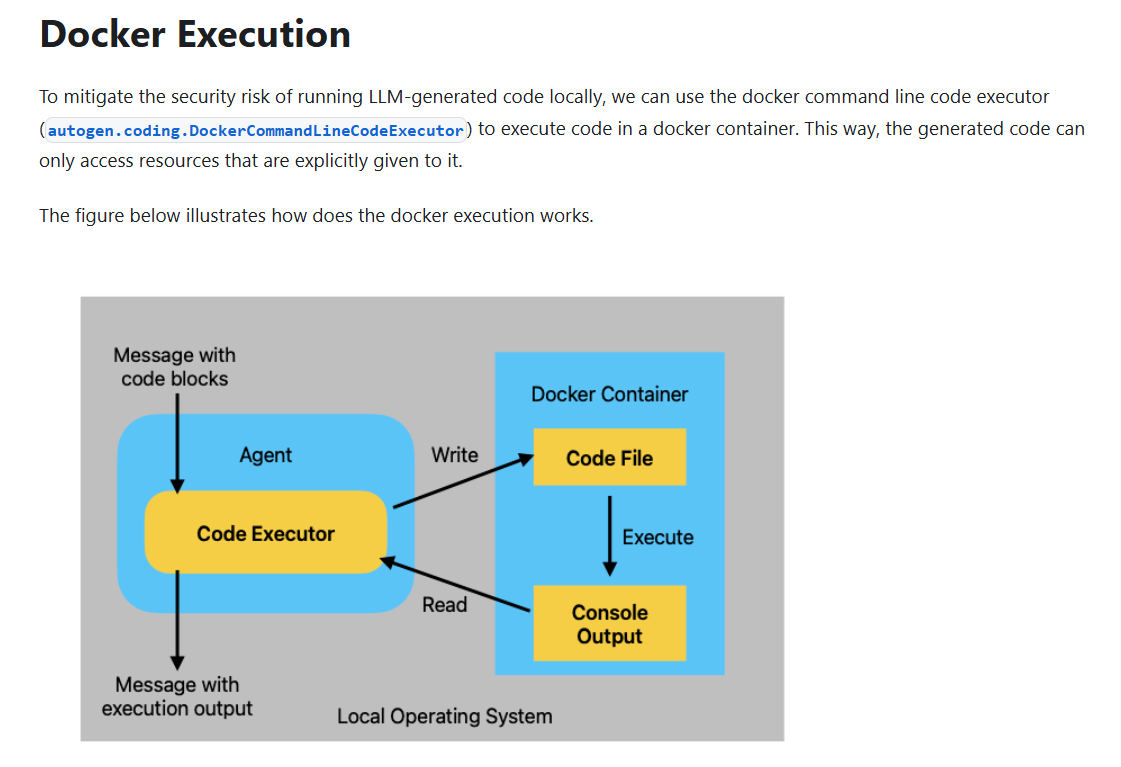

In [ ]:
from autogen.coding import DockerCommandLineCodeExecutor

# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a Docker command line code executor.
executor = DockerCommandLineCodeExecutor(
    image="python:3.12-slim",  # Execute code using the given docker image name.
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration that uses docker.
code_executor_agent_using_docker = ConversableAgent(
    "code_executor_agent_docker",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the docker command line code executor.
    human_input_mode="ALWAYS",  # Always take human input for this agent for safety.
)

# When the code executor is no longer used, stop it to release the resources.
# executor.stop()

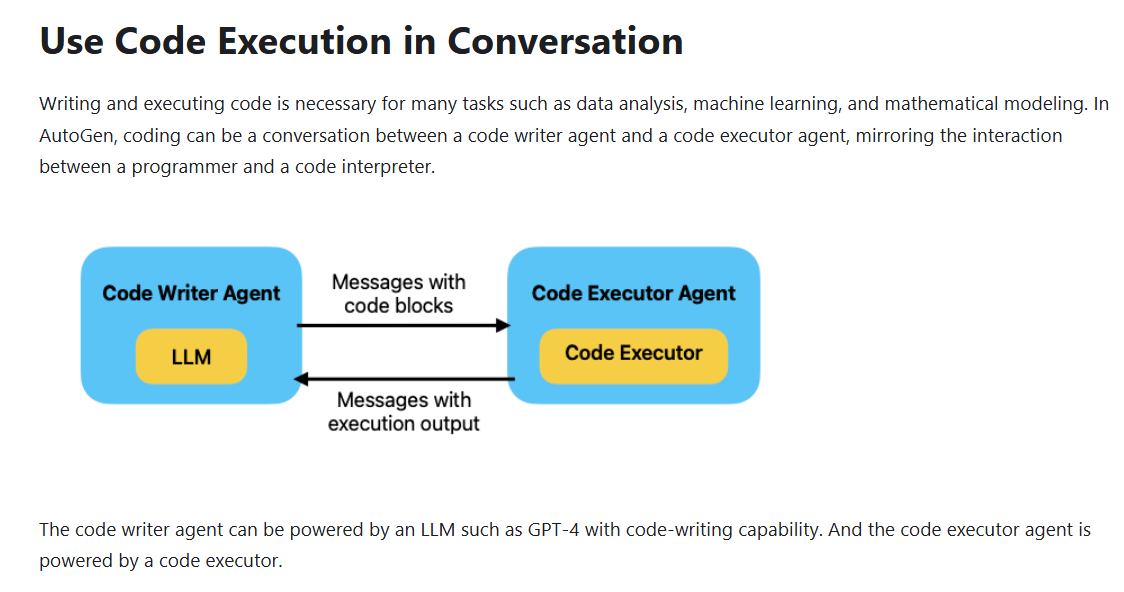

In [ ]:
# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Turn off code execution for this agent.
)

chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

In [ ]:
import datetime

today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python code to plot TSLA's and META's "
    "stock price gains YTD, and save the plot to a file named 'stock_gains.png'.",
)

In [ ]:
from IPython.display import Image

Image(os.path.join(temp_dir, "stock_gains.png"))

In [ ]:
temp_dir.cleanup()

In [ ]:
executor.stop()  # Stop the docker command line code executor.

## Tool Use

In [17]:
#Tools are pre-defined functions that agents can use. Instead of writing arbitrary code, agents can call tools to perform actions, such as searching the web, performing calculations, reading files, or calling remote APIs. Because you can control what tools are available to an agent, you can control what actions an agent can perform.


In [21]:
##Creating Tools
from typing import Annotated, Literal

Operator = Literal["+", "-", "*", "/"]


def calculator(a: int, b: int, operator: Annotated[Operator, "operator"]) -> int:
    if operator == "+":
        return a + b
    elif operator == "-":
        return a - b
    elif operator == "*":
        return a * b
    elif operator == "/":
        return int(a / b)
    else:
        raise ValueError("Invalid operator")

In [22]:
#Registering Tools

import os

from autogen import ConversableAgent

# Let's first define the assistant agent that suggests tool calls.
assistant = ConversableAgent(
    name="Assistant",
    system_message="You are a helpful AI assistant. "
    "You can help with simple calculations. "
    "Return 'TERMINATE' when the task is done.",
    llm_config={"config_list": config_list},
)

# The user proxy agent is used for interacting with the assistant agent
# and executes tool calls.
user_proxy = ConversableAgent(
    name="User",
    llm_config=False,
    is_termination_msg=lambda msg: msg.get("content") is not None and "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
)

# Register the tool signature with the assistant agent.
assistant.register_for_llm(name="calculator", description="A simple calculator")(calculator)

# Register the tool function with the user proxy agent.
user_proxy.register_for_execution(name="calculator")(calculator)

In [23]:
#Alternatively, you can use autogen.register_function function to register a tool with both agents at once.

from autogen import register_function

# Register the calculator function to the two agents.
register_function(
    calculator,
    caller=assistant,  # The assistant agent can suggest calls to the calculator.
    executor=user_proxy,  # The user proxy agent can execute the calculator calls.
    name="calculator",  # By default, the function name is used as the tool name.
    description="A simple calculator",  # A description of the tool.
)

C:\Users\Abhishek Jaiswal\.conda\envs\tenv\Lib\site-packages\autogen\agentchat\conversable_agent.py:2979: UserWarning: Function 'calculator' is being overridden.
  warnings.warn(f"Function '{tool_sig['function']['name']}' is being overridden.", UserWarning)
C:\Users\Abhishek Jaiswal\.conda\envs\tenv\Lib\site-packages\autogen\agentchat\conversable_agent.py:2901: UserWarning: Function 'calculator' is being overridden.
  warnings.warn(f"Function '{name}' is being overridden.", UserWarning)


In [24]:
#Using Tool
chat_result = user_proxy.initiate_chat(assistant, message="What is (44232 + 13312 / (232 - 32)) * 5?")

User (to Assistant):

What is (44232 + 13312 / (232 - 32)) * 5?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Assistant (to User):


***** Suggested tool call (qYywkT1De): calculator *****
Arguments: 
{"a": 232, "b": 32, "operator": "-"}
*******************************************************
***** Suggested tool call (h1UzfItZB): calculator *****
Arguments: 
{"a": 13312, "b": 190, "operator": "/"}
*******************************************************
***** Suggested tool call (OR3OSuWmE): calculator *****
Arguments: 
{"a": 44232, "b": 69, "operator": "+"}
*******************************************************
***** Suggested tool call (wTbTBLBcI): calculator *****
Arguments: 
{"a": 44291, "b": 5, "operator": "*"}
*******************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION calculator...
Call ID: qYywkT1De
Input a

In [25]:
(44232 + int(13312 / (232 - 32))) * 5

221490

In [26]:
#Tool Schema
assistant.llm_config["tools"]

[{'type': 'function',
  'function': {'description': 'A simple calculator',
   'name': 'calculator',
   'parameters': {'type': 'object',
    'properties': {'a': {'type': 'integer', 'description': 'a'},
     'b': {'type': 'integer', 'description': 'b'},
     'operator': {'enum': ['+', '-', '*', '/'],
      'type': 'string',
      'description': 'operator'}},
    'required': ['a', 'b', 'operator']}}}]

## Conversation Patterns

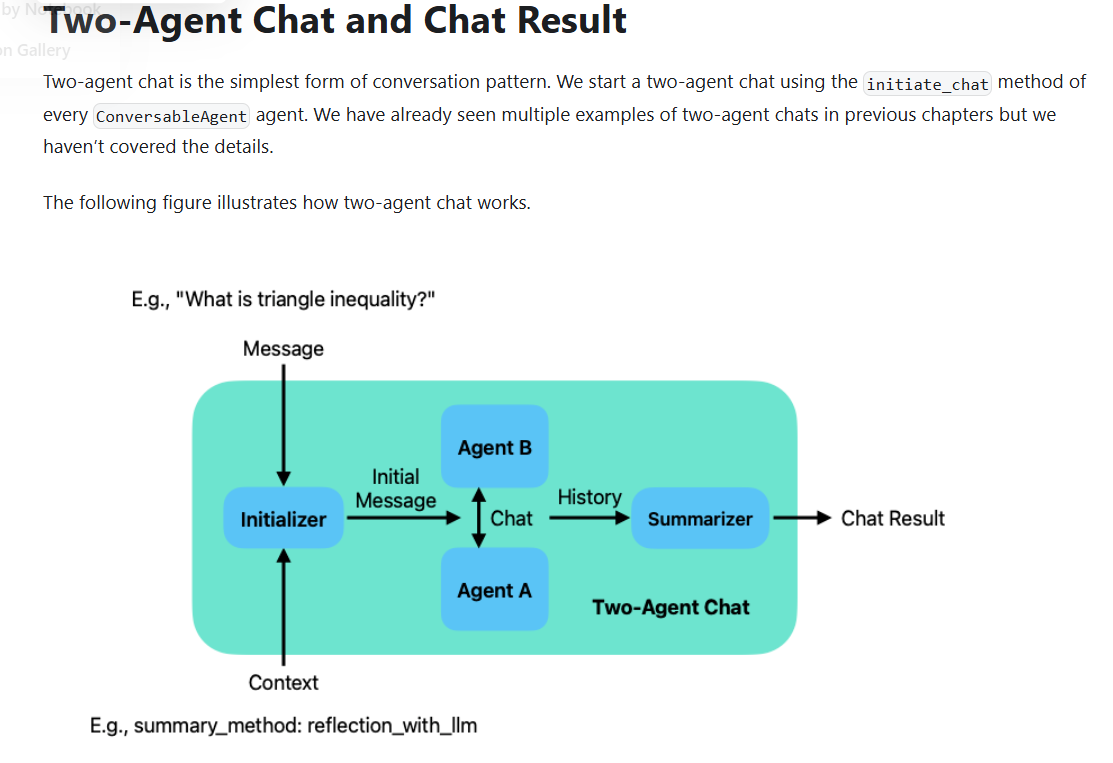

In [27]:
import os

from autogen import ConversableAgent

student_agent = ConversableAgent(
    name="Student_Agent",
    system_message="You are a student willing to learn.",
    llm_config={"config_list": config_list},
)
teacher_agent = ConversableAgent(
    name="Teacher_Agent",
    system_message="You are a math teacher.",
    llm_config={"config_list": config_list},
)

chat_result = student_agent.initiate_chat(
    teacher_agent,
    message="What is triangle inequality?",
    summary_method="reflection_with_llm",
    max_turns=2,
)

Student_Agent (to Teacher_Agent):

What is triangle inequality?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Teacher_Agent (to Student_Agent):

The Triangle Inequality is a fundamental concept in mathematics, particularly in geometry and analysis. It states that for any triangle, the sum of the lengths of any two sides must be greater than the length of the remaining side. This can be expressed mathematically as follows:

For a triangle with sides of lengths \(a\), \(b\), and \(c\):

1. \(a + b > c\)
2. \(a + c > b\)
3. \(b + c > a\)

These inequalities ensure that the lengths of the sides can form a valid triangle. If any of these inequalities are not satisfied, the given lengths cannot form a triangle.

### Applications and Implications

1. **Triangle Formation**: The Triangle Inequality is crucial for determining whether three given lengths can form a triangle. If the inequalities are not satisfied, the lengths canno

In [28]:
print(chat_result.summary)

{'content': 'The Triangle Inequality is a fundamental concept stating that for any triangle with sides of lengths \\(a\\), \\(b\\), and \\(c\\), the following must hold:\n\n1. \\(a + b > c\\)\n2. \\(a + c > b\\)\n3. \\(b + c > a\\)\n\nThis ensures that the given lengths can form a valid triangle. The Triangle Inequality is crucial in geometry, trigonometry, and various fields of mathematics and science. It is used to determine if three given lengths can form a triangle, to solve optimization problems, and to ensure the consistency of relationships between angles and sides of a triangle. By practicing with examples and problems, one can become more comfortable with applying the Triangle Inequality in various contexts.', 'refusal': None, 'role': 'assistant', 'audio': None, 'function_call': None, 'tool_calls': None}


In [29]:
print(ConversableAgent.DEFAULT_SUMMARY_PROMPT)

Summarize the takeaway from the conversation. Do not add any introductory phrases.


In [30]:
# Get the chat history.
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': 'What is triangle inequality?',
  'name': 'Student_Agent',
  'role': 'assistant'},
 {'content': 'The Triangle Inequality is a fundamental concept in mathematics, '
             'particularly in geometry and analysis. It states that for any '
             'triangle, the sum of the lengths of any two sides must be '
             'greater than the length of the remaining side. This can be '
             'expressed mathematically as follows:\n'
             '\n'
             'For a triangle with sides of lengths \\(a\\), \\(b\\), and '
             '\\(c\\):\n'
             '\n'
             '1. \\(a + b > c\\)\n'
             '2. \\(a + c > b\\)\n'
             '3. \\(b + c > a\\)\n'
             '\n'
             'These inequalities ensure that the lengths of the sides can form '
             'a valid triangle. If any of these inequalities are not '
             'satisfied, the given lengths cannot form a triangle.\n'
             '\n'
             '### Applications and Impl

In [31]:
# Get the cost of the chat.
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'mistral-small-latest': {'completion_tokens': 1899,
                                                               'cost': 0.008969000000000001,
                                                               'prompt_tokens': 3272,
                                                               'total_tokens': 5171},
                                      'total_cost': 0.008969000000000001},
 'usage_including_cached_inference': {'mistral-small-latest': {'completion_tokens': 1899,
                                                               'cost': 0.008969000000000001,
                                                               'prompt_tokens': 3272,
                                                               'total_tokens': 5171},
                                      'total_cost': 0.008969000000000001}}


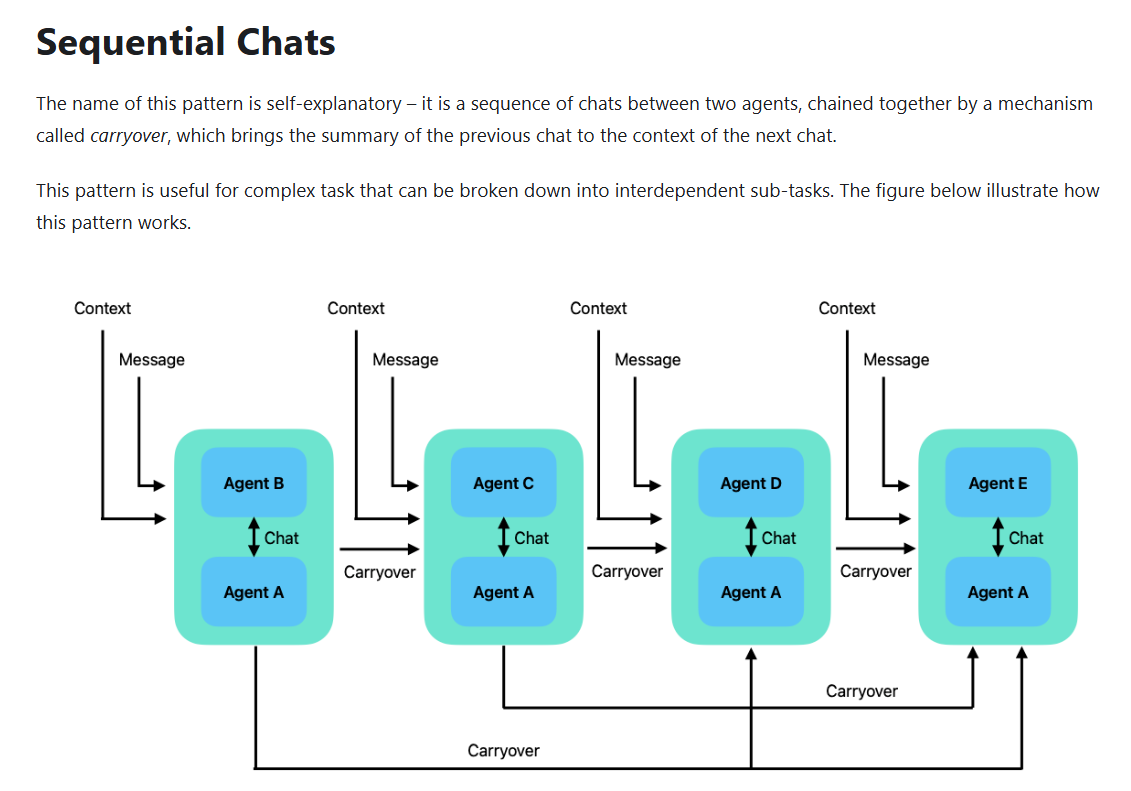

In [32]:
# The Number Agent always returns the same numbers.
number_agent = ConversableAgent(
    name="Number_Agent",
    system_message="You return me the numbers I give you, one number each line.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

# The Adder Agent adds 1 to each number it receives.
adder_agent = ConversableAgent(
    name="Adder_Agent",
    system_message="You add 1 to each number I give you and return me the new numbers, one number each line.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

# The Multiplier Agent multiplies each number it receives by 2.
multiplier_agent = ConversableAgent(
    name="Multiplier_Agent",
    system_message="You multiply each number I give you by 2 and return me the new numbers, one number each line.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

# The Subtracter Agent subtracts 1 from each number it receives.
subtracter_agent = ConversableAgent(
    name="Subtracter_Agent",
    system_message="You subtract 1 from each number I give you and return me the new numbers, one number each line.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

# The Divider Agent divides each number it receives by 2.
divider_agent = ConversableAgent(
    name="Divider_Agent",
    system_message="You divide each number I give you by 2 and return me the new numbers, one number each line.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

In [ ]:
# Start a sequence of two-agent chats.
# Each element in the list is a dictionary that specifies the arguments
# for the initiate_chat method.
chat_results = number_agent.initiate_chats(
    [
        {
            "recipient": adder_agent,
            "message": "14",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": multiplier_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": subtracter_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": divider_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
    ]
)

In [ ]:
print("First Chat Summary: ", chat_results[0].summary)
print("Second Chat Summary: ", chat_results[1].summary)
print("Third Chat Summary: ", chat_results[2].summary)
print("Fourth Chat Summary: ", chat_results[3].summary)

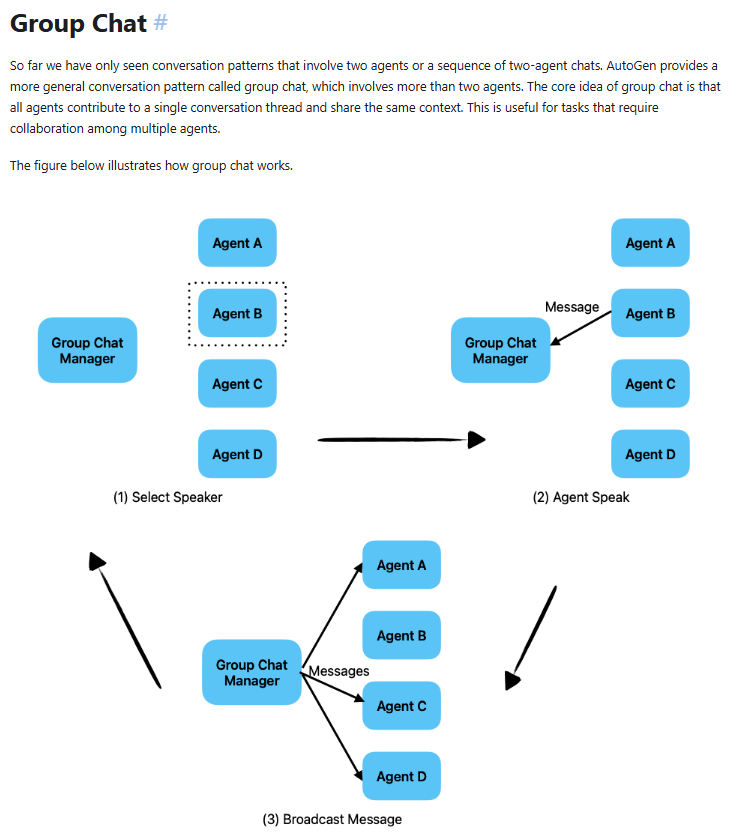

In [35]:
#The Group Chat Manager can use several strategies to select the next agent. Currently, the following strategies are supported:

#round_robin: The Group Chat Manager selects agents in a round-robin fashion based on the order of the agents provided.
#random: The Group Chat Manager selects agents randomly.
#manual: The Group Chat Manager selects agents by asking for human input.
#auto: The default strategy, which selects agents using the Group Chat Manager’s LLM.

In [ ]:
# The `description` attribute is a string that describes the agent.
# It can also be set in `ConversableAgent` constructor.
adder_agent.description = "Add 1 to each input number."
multiplier_agent.description = "Multiply each input number by 2."
subtracter_agent.description = "Subtract 1 from each input number."
divider_agent.description = "Divide each input number by 2."
number_agent.description = "Return the numbers given."

In [ ]:
from autogen import GroupChat

group_chat = GroupChat(
    agents=[adder_agent, multiplier_agent, subtracter_agent, divider_agent, number_agent],
    messages=[],
    max_round=6,
)

In [ ]:
from autogen import GroupChatManager

group_chat_manager = GroupChatManager(
    groupchat=group_chat,
    llm_config={"config_list": config_list},
)

In [ ]:
chat_result = number_agent.initiate_chat(
    group_chat_manager,
    message="My number is 3, I want to turn it into 13.",
    summary_method="reflection_with_llm",
)

In [ ]:
print(chat_result.summary)

In [ ]:
#Send Introductions
group_chat_with_introductions = GroupChat(
    agents=[adder_agent, multiplier_agent, subtracter_agent, divider_agent, number_agent],
    messages=[],
    max_round=6,
    send_introductions=True,
)

In [ ]:
#Group Chat in a Sequential Chat
# Let's use the group chat with introduction messages created above.
group_chat_manager_with_intros = GroupChatManager(
    groupchat=group_chat_with_introductions,
    llm_config={"config_list": config_list},
)

# Start a sequence of two-agent chats between the number agent and
# the group chat manager.
chat_result = number_agent.initiate_chats(
    [
        {
            "recipient": group_chat_manager_with_intros,
            "message": "My number is 3, I want to turn it into 13.",
        },
        {
            "recipient": group_chat_manager_with_intros,
            "message": "Turn this number to 32.",
        },
    ]
)

In [ ]:
#Constrained Speaker Selection
allowed_transitions = {
    number_agent: [adder_agent, number_agent],
    adder_agent: [multiplier_agent, number_agent],
    subtracter_agent: [divider_agent, number_agent],
    multiplier_agent: [subtracter_agent, number_agent],
    divider_agent: [adder_agent, number_agent],
}

In [ ]:
constrained_graph_chat = GroupChat(
    agents=[adder_agent, multiplier_agent, subtracter_agent, divider_agent, number_agent],
    allowed_or_disallowed_speaker_transitions=allowed_transitions,
    speaker_transitions_type="allowed",
    messages=[],
    max_round=12,
    send_introductions=True,
)

constrained_group_chat_manager = GroupChatManager(
    groupchat=constrained_graph_chat,
    llm_config={"config_list": config_list},
)

chat_result = number_agent.initiate_chat(
    constrained_group_chat_manager,
    message="My number is 3, I want to turn it into 10. Once I get to 10, keep it there.",
    summary_method="reflection_with_llm",
)

In [36]:
#Changing the select speaker role name

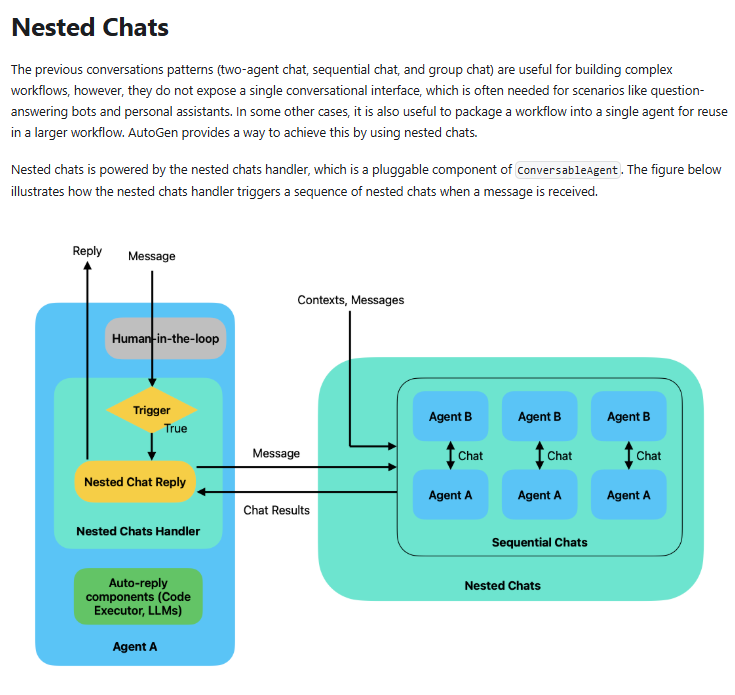

In [ ]:
import tempfile

temp_dir = tempfile.gettempdir()

arithmetic_agent = ConversableAgent(
    name="Arithmetic_Agent",
    llm_config=False,
    human_input_mode="ALWAYS",
    # This agent will always require human input to make sure the code is
    # safe to execute.
    code_execution_config={"use_docker": False, "work_dir": temp_dir},
)

code_writer_agent = ConversableAgent(
    name="Code_Writer_Agent",
    system_message="You are a code writer. You write Python script in Markdown code blocks.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

poetry_agent = ConversableAgent(
    name="Poetry_Agent",
    system_message="You are an AI poet.",
    llm_config={"config_list": config_list},
    human_input_mode="NEVER",
)

In [ ]:
nested_chats = [
    {
        "recipient": group_chat_manager_with_intros,
        "summary_method": "reflection_with_llm",
        "summary_prompt": "Summarize the sequence of operations used to turn " "the source number into target number.",
    },
    {
        "recipient": code_writer_agent,
        "message": "Write a Python script to verify the arithmetic operations is correct.",
        "summary_method": "reflection_with_llm",
    },
    {
        "recipient": poetry_agent,
        "message": "Write a poem about it.",
        "max_turns": 1,
        "summary_method": "last_msg",
    },
]

In [ ]:
arithmetic_agent.register_nested_chats(
    nested_chats,
    # The trigger function is used to determine if the agent should start the nested chat
    # given the sender agent.
    # In this case, the arithmetic agent will not start the nested chats if the sender is
    # from the nested chats' recipient to avoid recursive calls.
    trigger=lambda sender: sender not in [group_chat_manager_with_intros, code_writer_agent, poetry_agent],
)

In [ ]:
# Instead of using `initiate_chat` method to start another conversation,
# we can use the `generate_reply` method to get single reply to a message directly.
reply = arithmetic_agent.generate_reply(
    messages=[{"role": "user", "content": "I have a number 3 and I want to turn it into 7."}]
)

In [ ]:
#https://microsoft.github.io/autogen/0.2/docs/tutorial/conversation-patterns

In [ ]:
#https://microsoft.github.io/autogen/0.2/docs/Use-Cases/agent_chat

In [ ]:
# History is NOT maintained by Agents: generate_reply
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)

In [ ]:
# History is maintained by Agents: initiate_chat
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)